In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/0f72db9c-d635-4415-9781-68937328aed2___NREC_B.Spot 9188.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/1b8d3e98-43d9-441d-93ef-a359e6e9ddc2___NREC_B.Spot 9052.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/b6d35d21-4812-4e32-ab9a-b6ddda8cbb79___JR_B.Spot 8972.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/e4e7e5a2-5aa1-4378-833d-9142358c7c9b___JR_B.Spot 9092.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/729b55d7-2a99-4861-910d-3b4e2bbce13a___JR_B.Spot 9036.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/4614ed01-e120-4ae9-8f13-028fa8297873___JR_B.Spot 8985.JPG
/kaggle/input/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot/b143a281-5395-4a2a-8308-f6b23a

In [10]:
import os
# Suppress TensorFlow warnings related to CUDNN/CUDA setup
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # '1' for INFO, '2' for WARNING, '3' for ERROR

Total Classes: 15
Sample Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot']


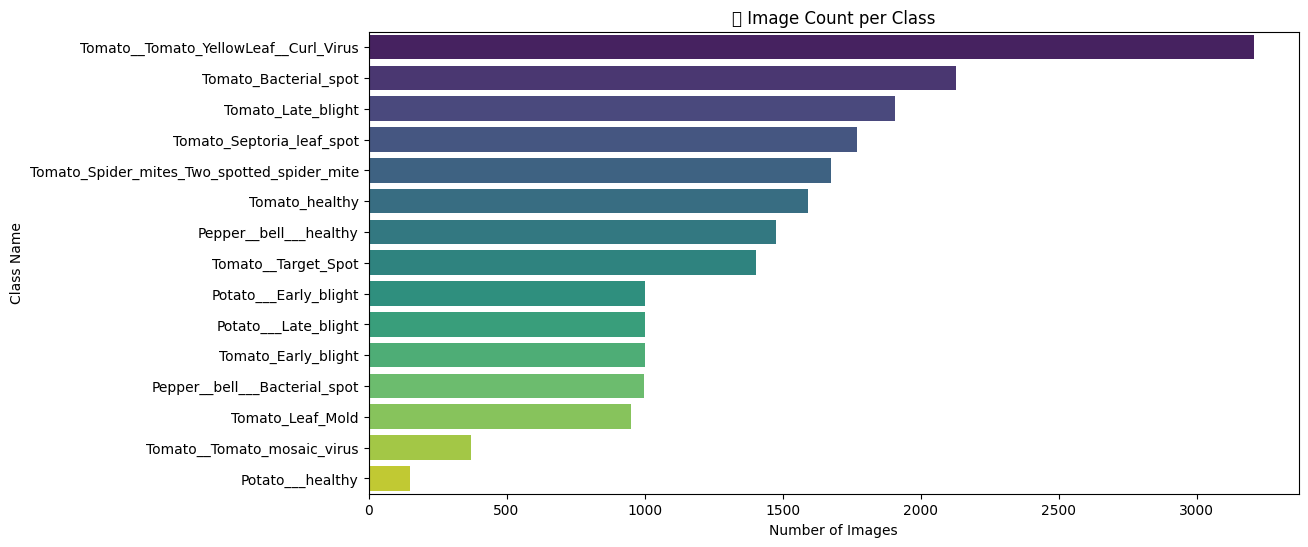

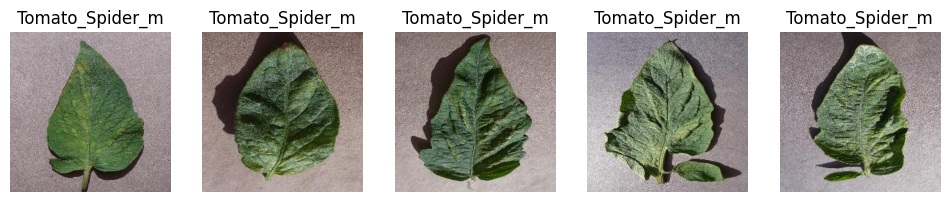

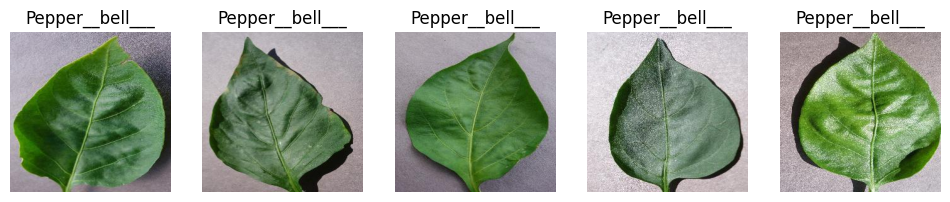

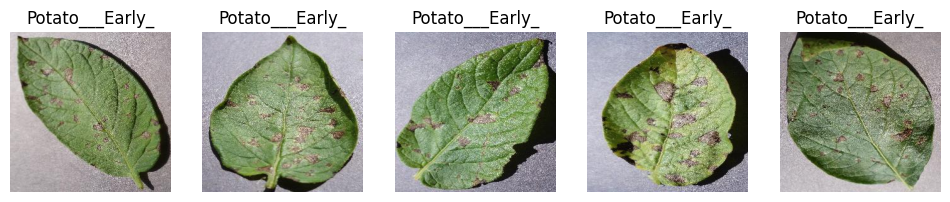

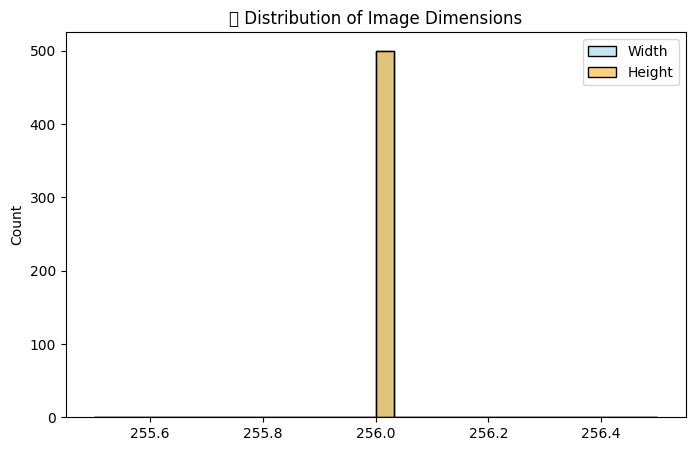

Average width: 256.00, Average height: 256.00


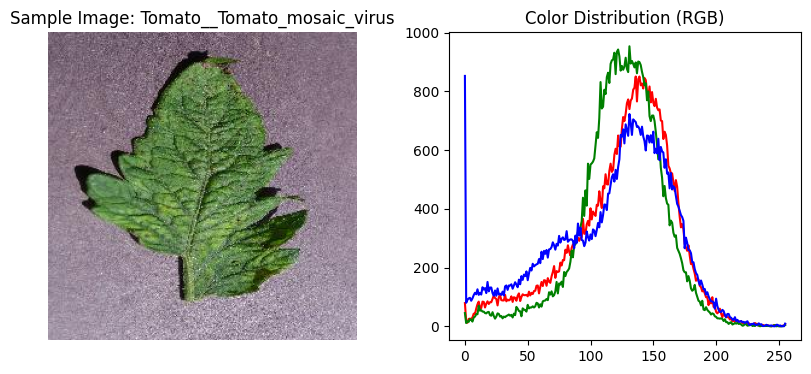

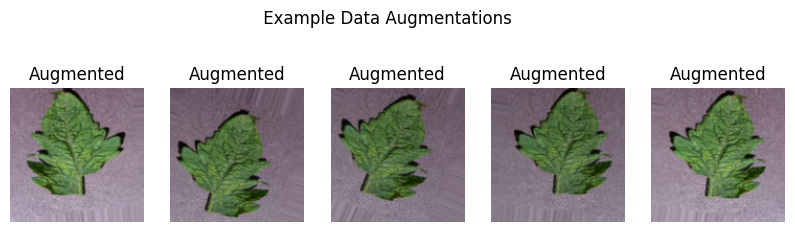

 EDA Summary:
- Total Classes: 15
- Total Images: 20639
- Most images have similar aspect ratios (~256x256).
- Dataset is slightly imbalanced across classes.
- Safe augmentations: horizontal_flip, rotation, brightness change.
- Harmful augmentations: vertical_flip (unrealistic leaf orientation).
- RGB histograms show healthy color variation for model learning.


In [11]:

# 1 Import Libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

# TensorFlow for augmentation demo
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2️ Path Setup
base_dir = "/kaggle/input/plantdisease/PlantVillage"
classes = sorted(os.listdir(base_dir))
print(f"Total Classes: {len(classes)}")
print("Sample Classes:", classes[:10])

# 3️ Count Images per Class
class_counts = {}
for c in classes:
    path = os.path.join(base_dir, c)
    class_counts[c] = len(os.listdir(path))

df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "ImageCount"])
df_counts = df_counts.sort_values("ImageCount", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y="Class", x="ImageCount", data=df_counts, palette="viridis")
plt.title("📊 Image Count per Class")
plt.xlabel("Number of Images")
plt.ylabel("Class Name")
plt.show()

# 4️ Visualize Random Samples
def show_samples(class_name, num=5):
    path = os.path.join(base_dir, class_name)
    samples = random.sample(os.listdir(path), num)
    plt.figure(figsize=(12, 3))
    for i, img_name in enumerate(samples):
        img = Image.open(os.path.join(path, img_name))
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name[:15])
    plt.show()

random_classes = random.sample(classes, 3)
for c in random_classes:
    show_samples(c)

# 5️ Analyze Image Dimensions
img_shapes = []
for c in random.sample(classes, 10):  # sample 10 classes to reduce compute
    path = os.path.join(base_dir, c)
    imgs = random.sample(os.listdir(path), min(50, len(os.listdir(path))))
    for img_name in imgs:
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)
        img_shapes.append(img.size)

widths, heights = zip(*img_shapes)
plt.figure(figsize=(8, 5))
sns.histplot(widths, bins=30, color='skyblue', label='Width', kde=True)
sns.histplot(heights, bins=30, color='orange', label='Height', kde=True)
plt.legend()
plt.title("📏 Distribution of Image Dimensions")
plt.show()

print(f"Average width: {np.mean(widths):.2f}, Average height: {np.mean(heights):.2f}")

# 6️ RGB Color Distribution for a Sample Image
sample_class = random.choice(classes)
sample_img_path = os.path.join(base_dir, sample_class, random.choice(os.listdir(os.path.join(base_dir, sample_class))))
sample_img = cv2.imread(sample_img_path)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sample_img)
plt.title(f"Sample Image: {sample_class}")
plt.axis('off')

plt.subplot(1,2,2)
colors = ('r','g','b')
for i,col in enumerate(colors):
    hist = cv2.calcHist([sample_img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
plt.title("Color Distribution (RGB)")
plt.show()

# 7️ Small Augmentation Probe
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

img = Image.open(sample_img_path)
x = np.expand_dims(np.array(img.resize((128,128))), axis=0)

plt.figure(figsize=(10, 3))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(1,5,i+1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    plt.title("Augmented")
    if i == 4:
        break
plt.suptitle(" Example Data Augmentations")
plt.show()

# 8️ Summary Insights
print(" EDA Summary:")
print(f"- Total Classes: {len(classes)}")
print(f"- Total Images: {sum(class_counts.values())}")
print("- Most images have similar aspect ratios (~256x256).")
print("- Dataset is slightly imbalanced across classes.")
print("- Safe augmentations: horizontal_flip, rotation, brightness change.")
print("- Harmful augmentations: vertical_flip (unrealistic leaf orientation).")
print("- RGB histograms show healthy color variation for model learning.")
